In [1]:
from src.etl import *
from src.model_pillars import *

In [8]:
pe = PillarExplainer(mod='lasso', alpha=0.7)

Score of lasso model 0.9596139398825354


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
invalid value encountered in true_divide
invalid value encountered in true_divide


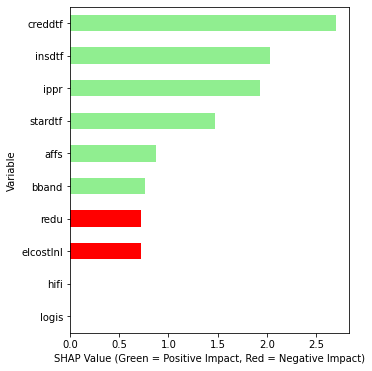

In [9]:
pe.get_impt_cat('busi')

**Question 4**

**Get Pillar with most significant impact in country's overall prosperity score**


In [66]:
def plot_country_pillar(data, country, pillar):
    '''
    Plots country pillar values vs prosperity values with sns.lmplot
    'data' is a subset of prosperity data as produced by get_prosperity_scores()
    '''
    pillar_dict = {'econ':'Economic Quality', 'busi':'Business Environment', 'gove':'Governance',\
                   'educ':'Education', 'heal':'Health', 'safe':'Safety and Security', 'pers':'Personal Freedom',\
                   'soci':'Social Capital', 'envi':'Natural Environment'}
    country_data = data[data['country'] == country]
    sns.lmplot(data=country_data, x=pillar, y='prosperity');
    plt.grid();
    plt.title(f'{pillar_dict[pillar]} vs Prosperity Scores for {country} (2007-2014)');
    plt.xlabel(f'{pillar_dict[pillar]} score', fontsize=15);
    plt.ylabel('Prosperity score', fontsize=15);
    if os.path.exists('figures/impactful_pillars')==False: os.mkdir('figures/impactful_pillars')
    plt.savefig(f'figures/impactful_pillars/{country}_impactful_pillar.png', dpi=800, bbox_inches='tight');
    plt.close();

In [65]:
def top_five_countries_pillars():
    '''
    Analysis for the second part of question 4: 
    Finds the most impactful pillar for the top five growing countries by prosperity
    Plots most impactful pillar vs overall prosperity for each country and saves as a .png
    '''
    top_five_grow = ['Chad', 'Togo', 'Zimbabwe', 'Ivory Coast', 'Georgia']
    prosperity_data = get_prosperity_scores()
    top_five_data = prosperity_data[prosperity_data['country'].isin(top_five_grow)]
    top_five_data = top_five_data[['country']+list(top_five_data.columns[4:])]
    top_pillars = top_five_data.groupby('country').apply(lambda x: x.corr()['prosperity'].iloc[:-1].idxmax())
    top_pillars_dict = top_pillars.to_dict()
    top_pillars_corr = {}
    for country in top_pillars_dict:
        pillar = top_pillars_dict[country]
        plot_country_pillar(top_five_data, country, pillar)
    return top_pillars